# Introduction to Tree-Based Methods


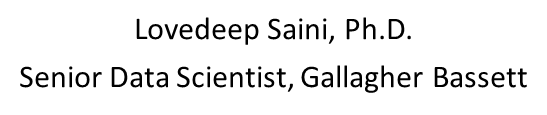



* Decision Trees (DTs) are an important type of algorithm for predictive modeling
* Applied to both classification and regression machine learning problems
* Introduced by Leo Breiman – around for decades – modern variations like random forest, gradient boosting are most powerful techniques
* **Classically** referred as **‘decision trees’**, **Modern name CART** (Classification and regression trees)

![image.png](Tree.jpg)


### Why this tree is 'upside down'?

- As we will go down this note-book, we'll see that our tree starts with root and leaves are at the bottom of the tree.

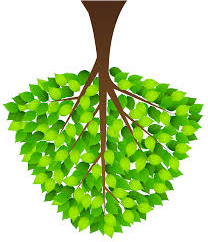

# A beginner's introduction to the Decision Tree learning

Although DTs can be used for both classification and regression problems, but for this tutorial let's foucs on classification problems only.



## DT Model Representation and Learning

- The DT model is respresented as a binary tree structure. 
- The **binary tree** is a succession of records called **nodes**. 
- Each node is linked to at-most two successor nodes referred to as its left and right children. 
- The first node at the origin of the tree has no parent and is called **root node**.   
- The terminating nodes that do not have any successors are called **leafs or terminal nodes**. 
- In a non-trivial tree, the root node is linked to each leaf through a series of **intermediate nodes**. 
- The number of steps between root and the furthest leaf node is called the **depth** of the tree.
- Each non-leaf node in a DT represents a **splitting** condition based on a single input variable. 
- Based on how splitting condition evaluates for a data record on the node, the record gets to assigned to either of its children. This process continues till the record trickles down to a leaf node - each of which is associated with a class label. 

![DTdemo.png](DTdemo.png)

Due to intuitive binary tree representation of trained model, making predictions for new data is straight forward. 
    - The new data record is presented at root and travels through the tree until it ends up on one of the leaf nodes. The class label of that leaf node is then assigned to this record as its predicted class.  



## Thought Experiment
* **To get some motivation behind using DT method**



- Lets suppose that we have bussiness log of a merry-go-round at a county fair. 
  - In the interest of saftey, they screen some of the children from going up the machine without giving an exact reason. 
 - So, is it possible to detect the rules of entry by analysing the data in the logs at hand?



![data.PNG](data.PNG)
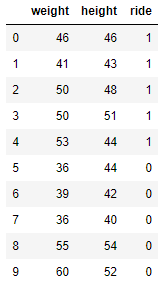

Assuming that the dataset has one record per kid willing to go up the ride, we have:
- 2 feature columns describing weight and height of each kid. 
- The column 'ride' is a binary flag to indicate if he or she was allowed (value=1) or not (value=0) up the machine.

Let us look at the scatter plots for the feature variables to visually detect any pattern if possible.
 - Each point represents one child.
 - Red points, are the children that were allowed.
 - Blue points, are the children that weren't allowed up the machine.

![LinearReg.PNG](LinearReg.PNG)
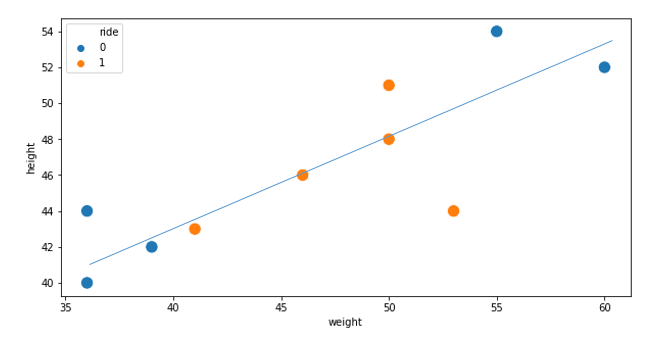

Well not very surprisingly, **we notice that height and weight are strongly correlated**. We also see that both the classes - **allowed (in red color) vs unallowed (in blue color)** form well separated groups on scatter plots.



We can decide partition on this two-dimensional feature space as shown below:

![Boundry.PNG](Boundry.PNG)
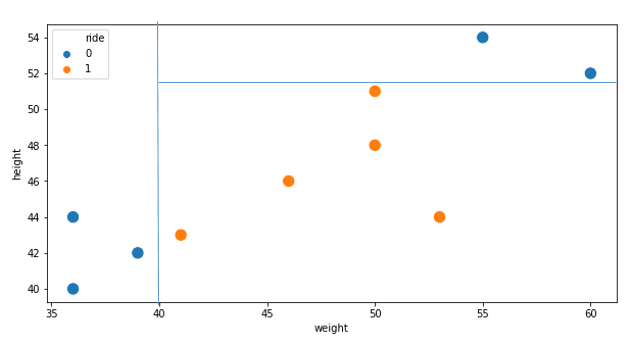

![Rule.PNG](Rule.PNG)
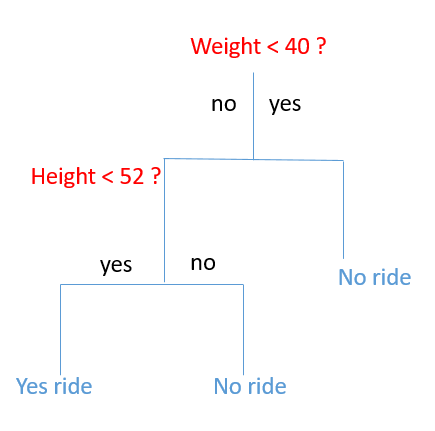

This tree can be stored to a file as set of following rules:

**Rule representation of DT**

- IF Weight < 40 THEN ride=No
- IF Weight >= 40 AND HEIGHT < 52 THEN ride=Yes
- IF Weight >= 40 AND HEIGHT >= 52 THEN ride=No


If we name three-region partition as R1, R2, and R3, then keeping with above defined tree analogy, these are our **terminal nodes or leaves** of the tree.

![Regions.PNG](Regions.PNG)
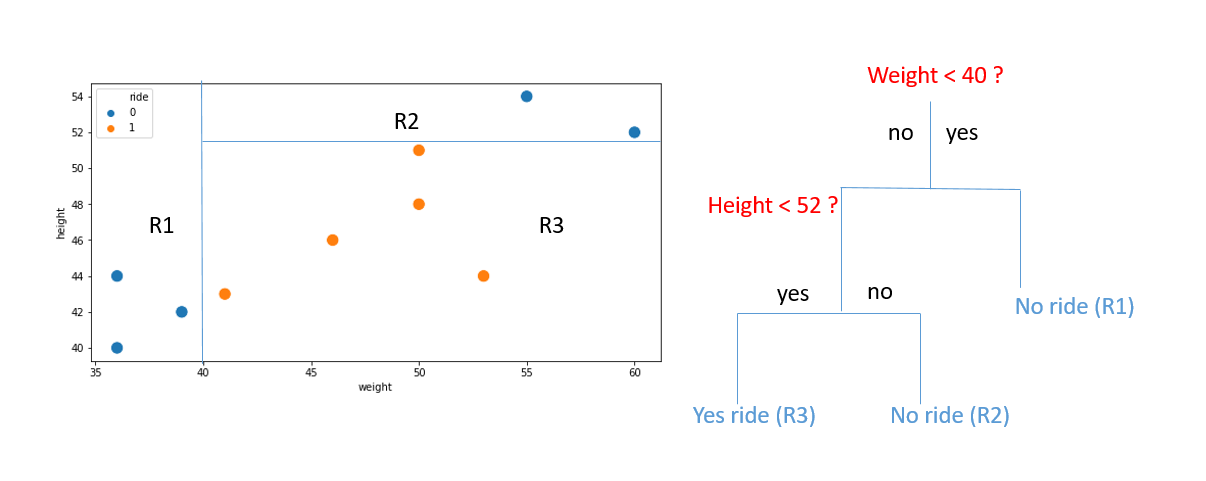

### Making Prediction

With above binary tree representation, making prediction on new data is straight forward. 

- New data will filter through the tree and lands in one of the region or terminal node. 
- Output value for that region is the prediction made by the model.

This gives you feeling for the type of decisions that a DT model is capable of making.

**DIY: Find prediction, given new data with weight = 52 and height = 53** 
- Hint: traverse above tree or check rule or look for boxy-decision boundry 


# How DT model learns from data?

Creating a binary DT => process of dividing up the input space => Recursive binary splitting



####  Now how does the DT algorithm decide the best **splitting** criterion for an intermediate node?

### Split Criterion

- Finding a best split condition at any node involves identifying **which feature** to use as well as deciding **the boundary of the split**. 
- For each of the available input feature, **all possible split points are evaluated** using a cost function with an aim to minimize it. 
- The popular strategies for defining cost function are based on the choices such that each split minimizes the impurity at the child nodes. 

Most common criteria to measure the quality of a split for classification predictive modeling problems are:

#### GINI Index

The GINI index provides an indication of how pure the leaf nodes are i.e. how mixed the training data assigned to each node is. It measures the impurity or say variance across the K classes using a quite simple calculation:
$$G = \sum_{k=1}^K p_k \times (1-p_k)$$ , where $p_k$ are number of training instances with class k in the region of interest. 

- Its defined in a way that its value is **minimum when all the records at the node belongs to same class** and **maximum when each record belongs to a distinct class resulting in 50-50 split** of classes in a binary classification problem. 
- In GINI driven DT algorithms, the split condition is chosen to ensure that overall impurity after the split is as less possible as than the impurity at parent node. 

#### Entropy 

An alternate to Gini index is 'Entropy', given as:
$$E = - \sum_{k=1}^K p_k log(p_k)$$

- The entropy at a node is a measure of randomness in its data. 



**Constructing a decision tree is all about finding feature that returns most homogeneous branches.**



#### Now how a DT knows that sufficient conditions to stop splitting the node has been met? 

### Stopping Criterion

The DT learning needs to know when to stop splitting as it works its way down the tree with training data.

- An obvious idea is to reject a split if **number of data records** at any of the children-node is less than some threshold. This way a particular branch would stop growing once this condition of minimum number of data records in terminal node is met.
 
  
- Another idea is to pre-define the **maximum depth** of the tree i.e. the maximum number of nodes from the root node of the tree. Once this condition of maximum depth of the tree is met, further splitting into new nodes must stop.

Without such stopping requirements, the tree might grow deep and complex, thus resulting into a model that learns the details and noise from the training data so well that it fails to generalize to unseen data. This problem is known as the **overfit** problem - for example:
   - If number of data records in terminal node is too specific i.e. 1, then tree will **overfit** the training data and we'll have poor performance on test-data.


### Advantages and Disadvantages 

The decision trees have several advantages. 

1. These are **easy to explain** to a non-expert as they result in a set of simple decision rules.
2. The trained DT model follows the same approach as humans generally follow while making decisions.
3. **Interpretation** of a DT model can be simplified by its **graphical visualization**.
4. Unlike several other algorithms DT can handle huge data sets with mixed predictors. No need of dummy-fying the predictors.
5. Can easily ignore the redundant variables and help in selecting best features.
6. Handle missing data elegantly.

These are definitely huge positives especially while working in commercial environment where not all the stake holders are either interested or capable of understanding complex modeling approaches. But decision trees have some very prominent disadvantages too:

Disadvantages:

1. Calculations can become complex when there are many class labels.
2. Very high probability of overfitting 
3. Generally, DTs have **lower prediction accuracy** compared to other machine learning algorithms.
4. Can be unstable (very non-robust) because **small variations in datasets can result in completely different trees**, but **ensemble of DTs (**bagging, random forests, boosted DTs**) can help** here.
5. For imbalanced classes, DTs can be **biased towards dominating classes**. So, dataset should be balanced prior to train the DT model. 

Before jumping into **Ensemble DT methods**, let's work through a python program that uses the DT algorithm as implemented in scikit-learn machine learning library. 

# Implement Decision-Tree-Classifier using python

### Load basic Libraries

In [1]:
#Load the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


### Create Pandas data-frame

In [2]:
# create dataframe
#age =    [6,  5,  7,  7,  7,  5,  5,  4,  8,  8]
weight = [46, 41, 50, 50, 53, 36, 39, 36, 55, 60]
height = [46, 43, 48, 51, 44, 44, 42, 40, 54, 52]
ride =   [1,  1,  1,  1,  1,  0,  0,  0,  0,  0]
#df = pd.DataFrame({"age":age,"weight":weight, "height":height, "ride":ride}, columns=["age","weight","height","ride"]) 
df = pd.DataFrame({"weight":weight, "height":height, "ride":ride}, columns=["weight","height","ride"]) 
df.head(10)                  #print out training dataset

,weight,height,ride
0,46,46,1
1,41,43,1
2,50,48,1
3,50,51,1
4,53,44,1
5,36,44,0
6,39,42,0
7,36,40,0
8,55,54,0
9,60,52,0


### EDA

We'll just check out a simple pairplot for this small dataset.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


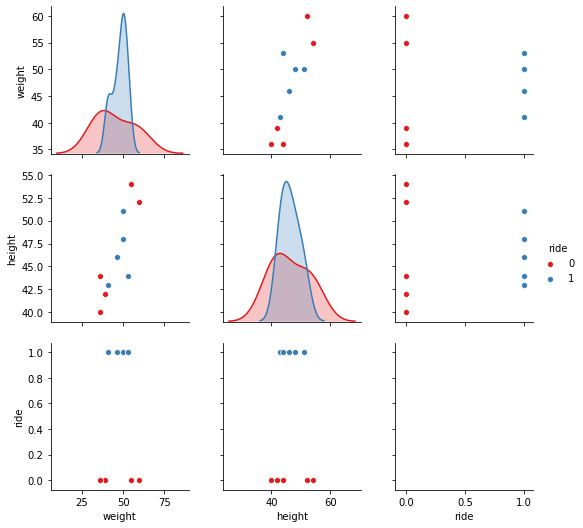

In [3]:
sns.pairplot(df,hue='ride',palette='Set1')

There is great deal of information in above figures:
- density plots along the diagonal for ride=0 observations for two of input features are slightly right skewed. 
- All of the scatter plots in off-diagonal figures show strong correlations 


While in this over simplified example, it is indeed possible to determine rules just by looking at these images - but we will train a DT model to see if it can do that. **The cases in real life are certainly far too big and complex** to let any conclusion just through human perception.

### Using DT Classifier from scikit-learn

Note that DT algorithm implementation in scikit-learn package takes some important parameters like for splitting and stopping criteria as discussed above. In exercise below, we will play with the parameter named as "criterion" that defines the function to measure the quality of the split. We will leave rest of the parameters to their default setup for this tutorial. The [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) package supports "gini" and "entropy" as shown below.

In [4]:
#Create instances of DT classifier
dt_gini = DecisionTreeClassifier(criterion='gini')      #Create a GINI driven DT classifier
dt_ent  = DecisionTreeClassifier(criterion='entropy')   #Create Information Gain DT classifier

#Prepare training data
X = df.drop('ride',axis=1)                              #Creating the feature set
y = df['ride']                                          #Creating the target set

#Training Phase : Fit DT to the data.
dt_gini.fit(X,y)                                        #Fit the GINI driven DT
dt_ent.fit(X,y)                                         #Fit the InfoGain driven DT
print('')

### Visualizing the Trained DT

A great advantage with DT is how easily they could be visualized and interpretted. 
We can easily export the trained tree in Graphviz (a visulization software) format using the export_graphviz exporter and visulize the set of rules alongwith gini or entropy score and training records in each node.

First we show the GINI driven DT:

[Text(133.92000000000002, 181.2, 'X[0] <= 40.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 54.0\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

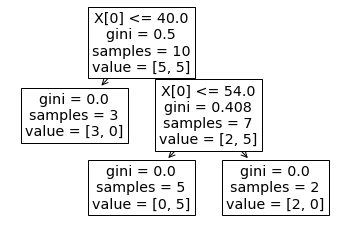

In [76]:
from sklearn import tree
tree.plot_tree(dt_gini.fit(X,y))

This visual show us how a GINI based tree would make decisions when put to test and similarly we print a graphic for the entropy based DT **(DIY)**.

You'll notice that both the Gini and Entropy driven DTs endup with same splitting criteria and in same order. Because both cost-functions behave quite similar in such simple cases, but depending on the dataset from real world, these splitting methods could end up in choosing different features and split points.

Let us explain the trained model using above visulization of DT:
- Root node: The first splitting happens at the root using "weight" feature. Note the gini score, 0.5 and 1, respectively. This is because ride label has 50-50 split here, 5 kids got ride and 5 kids were denied.
- Split condition: "Is weight less than or equal to 40 pounds?". The candidates who pass for this condition ends up in left leaf node (gini/entropy=0 i.e. pure node with 3 records of class label=0). 
- Then the candidates who failed this condition are subject to second criterion "Is weight less or equal to 54 pounds?" The ones evaluating false are denied an entry too and ends up in right leaf with two training records of label=0 thus gini=0 for this terminal node. Those five candidate records that pass the this condition, gets the ride and ended up in pure leaf node on left end.

## Making Predictions

Let us create a test dataset, that will use the trained model to predict the class label i.e. based on known values of features like age, weight etc., whether the kid should be allowed to get the ride or not. We have created this test data example alongwith the known class labels so that we could use it for performance evaluation later.

In [5]:
# create dataframe
#age_t =    [5, 8, 7, 6, 3, 4]
weight_t = [39, 59, 49, 45, 35, 38]
height_t = [45, 53, 50, 46, 37, 40]
ride_t =   [0, 0, 1, 1, 0, 0]
#df_test = pd.DataFrame({"age":age_t,"weight":weight_t, "height":height_t, "ride_t": ride_t}) 
df_test = pd.DataFrame({"weight":weight_t, "height":height_t, "ride_t": ride_t}) 

In [6]:
X_test = df_test.drop("ride_t", axis=1)
y_test = df_test.ride_t

In [7]:

#Testing Phase: Test trained DT
predictions_gini = dt_gini.predict(X_test)                          #Make predictions from "gini" based tree. 
print(predictions_gini)

predictions_ent = dt_ent.predict(X_test)                           #Make predictions from "entropy" based tree. 
print(predictions_ent)

[0 0 1 1 0 0]
[0 0 1 1 0 0]


### Evaluating the Model Performance

Since this is an oversimplified example containing just a few rows of handcrafted data, it does not make much sense to talk about the metrics related to model performance here. But in our part-2 of this tutorial which is a case study using data from real world, we will spend quite a few calories on these metrics.

## Enhancing Decision Trees

The plain vanila DT learners are simple but often not very useful in real life situations. 
- Several variations of DTs have been developed to overcome the disadvantages and achieve robust and powerful classification algorithms. 
- This simple algorithm provides a base for several ensemble methods like bagging, random forests and boosting that we will discuss below.

# Ensemble Methods


## Bagging, Random Forest and Boosting

- Use trees as building blocks to construct more powerful predictive models
- A single DT is very sensitive to training data, if it is changed (say tree is trained on subset of data), the resulting DT can be quite different and hence the predictions. **Thus DTs suffer from high variance problem.** This is where power for bagging comes from, by combining the predictions from models that have very different perspectives on the problem.

### Bagging

- Create multiple copies of the original training dataset (with replacement) and fitting a separate DT to each copy, and then combining all the trees in order to create a single predictive model.
- Based on **bootstrap aggregation**, a general purpose procedure for reducing the variance of a statistical learning method.
  - For a set of n independent observations, $Z_1$ to $Z_n$, each with variance $\sigma^2$, the variance of mean ($\bar{Z}$) of the observations is $\sigma^2/n$ => 
  - **averaging a set of observations reduces variance.**
- Tress are grown deep and are not pruned => each tree has high variance, but low bias => averaging these trees reduces the variance.
- Results in impressive improvement in prediction accuracy at the expense of interpretability
  - by combining 100s or 1000s of trees into a single procedure. But hard to interpret => no loner clear which variables are most important to the procedure
  
- But we can obtain an overall summary of the importance of each predictor.

### Random Forests
- Improvement over bagged trees by way of a small tweak that **decorrelates the trees**.
- As we build a number of DTs on bootstrapped training samples, each time a split in the tree is considered, a random sample of m predictors (features) is chosen as split candidates from the full set of p predictors
  - The split is allowed to use only one of those m predictors

##### What's the point?
- This idea may sound crazy, but it has a clever rationale 
    => suppose there is one very strong predictor in dataset along with a number of other moderately strong predictors, then collection of bagged trees will use this strong predictor in the top split   
    - All the bagged trees will look similar to each other 
            => hence **highly correlated predictions from all bagged trees**.
- **Averaging many highly correlated quantities does not lead to as large of a reduction in variance as averaging many uncorrelated quantities.**
- Random forests overcome this problem by forcing each split to consider only a subset of the predictors 
        => strong as well as other predictors will have more of a chance 
            => decorrelated trees 
                => thereby making the average of resulting trees less variable and hence more reliable.

### Boosting
- General ensemble method that creates a strong classifier from a number of weak classifiers.
     - this is done by building first model from training dataset, 
         - then creating a second model that attempts to correct the errors from the first model. 
     - In other words, we fit a new tree to the residuals from current model rather than the output/respose variable Y.
     - Each of these trees are small with few terminal nodes. Thus by fitting small trees to the residuals, models are added until the training set is predicted perfectly. 
     
- Unlike fitting a single DT to data, which amounts to fitting the data hard and potentially overfitting, **boosting approach learns slowly.**
- Examples of boosting algorithms: **AdaBoost, Gradient Tree Boosting, Xtreme Gradient Boosting, Categorical Boosting etc.**

# Implement Random-Forests using python